In [119]:
from google.colab import files
uploaded = files.upload()

In [373]:
# Importing standard packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import calinski_harabasz_score as chs

In [369]:
df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv('Data2.csv')
df3 = pd.read_csv('Data3.csv')
df4 = pd.read_csv('Data4.csv')
df5 = pd.read_csv('Data5.csv')
df6 = pd.read_csv('Data6.csv')
df7 = pd.read_csv('Data7.csv')
df8 = pd.read_csv('Data8.csv')

**Dataset 1**

In [222]:
df1

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,1
1,2,-0.000731,0.048211,0.069198,1
2,3,-0.060767,-0.009080,0.053085,1
3,4,0.013252,-0.011876,0.055324,1
4,5,-0.054508,-0.003813,0.001738,1
...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,7
208,209,0.396046,-0.858377,-3.126866,7
209,210,-0.406362,-0.334541,-2.885598,7
210,211,-0.299275,0.071281,-3.642585,7


In [223]:
##performing kmeans clustering with 7 clusters
kmeans1 = df1.iloc[:,1:4]
kmeans = KMeans(n_clusters = 7)
mdl=kmeans.fit(kmeans1)

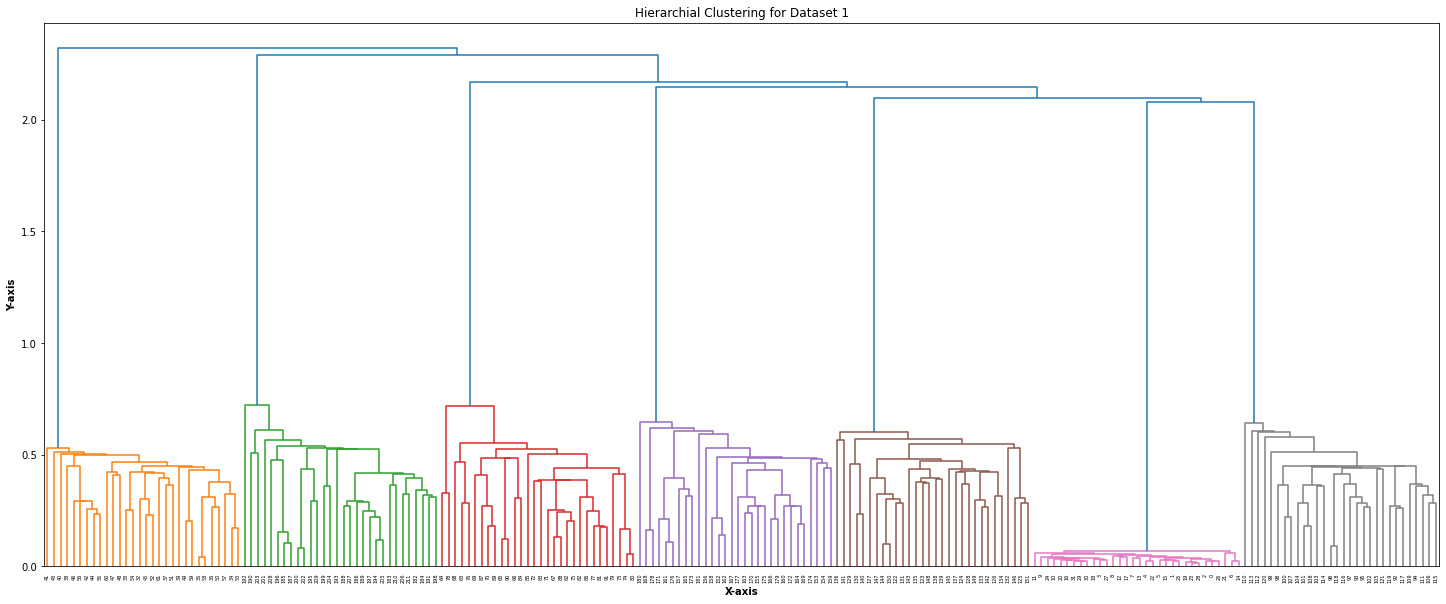

In [224]:
# hierarchical clustering algorithm for dataset 1
Z = linkage(kmeans1, 'single')

# Cluster Dendrogram for dataset 1
figure = plt.figure(figsize=(25, 10))
den = dendrogram(Z)
plt.title('Hierarchial Clustering for Dataset 1')
plt.xlabel('X-axis', fontweight='bold')
plt.ylabel('Y-axis', fontweight='bold')
plt.show()

In [225]:
df1['Class'] = df1['Class']-1         ##reinitiating class to match with kmeans classification
df1

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,0
1,2,-0.000731,0.048211,0.069198,0
2,3,-0.060767,-0.009080,0.053085,0
3,4,0.013252,-0.011876,0.055324,0
4,5,-0.054508,-0.003813,0.001738,0
...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,6
208,209,0.396046,-0.858377,-3.126866,6
209,210,-0.406362,-0.334541,-2.885598,6
210,211,-0.299275,0.071281,-3.642585,6


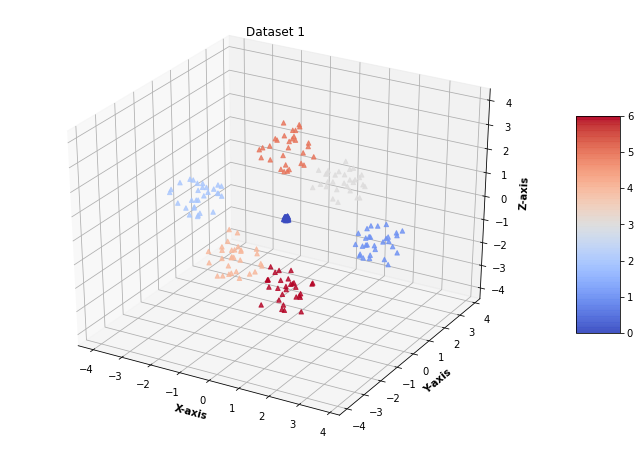

In [226]:
#Plot (2D or 3D) the data points for each dataset and color them according to the original class

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df1['X1']
y = df1['X2']
z = df1['X3']
original_class = df1['Class']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= original_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Dataset 1")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

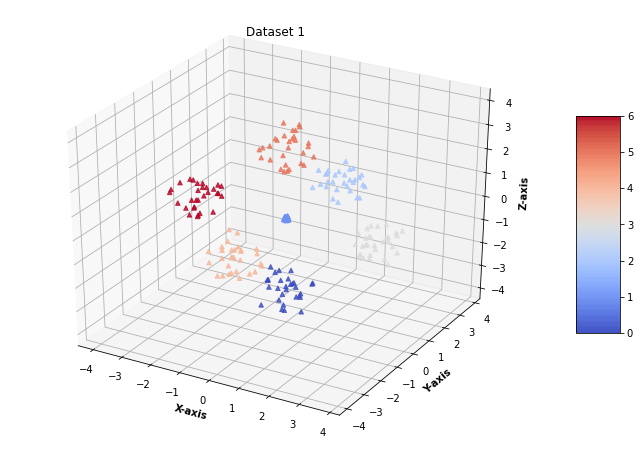

In [227]:
#Plot (2D or 3D) the data points for each dataset and color them according to the clustering algorithm
# Using K-Means

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df1['X1']
y = df1['X2']
z = df1['X3']

new_class= kmeans.labels_

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= new_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)
plt.title("Dataset 1")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()


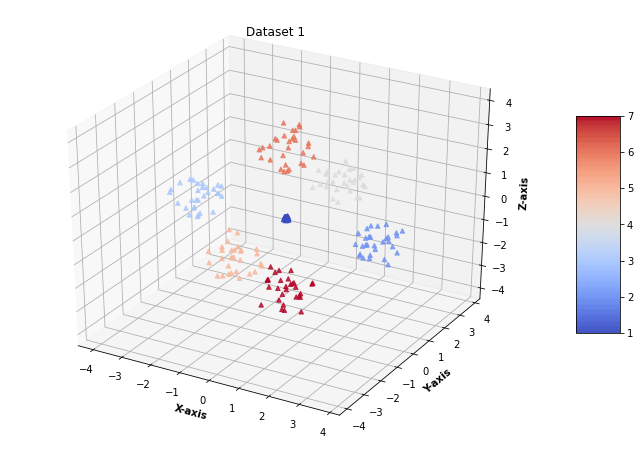

In [228]:
#Plot (2D or 3D) the data points for each dataset and color them according to the clustering algorithm
# Using Hierarchial Clustering

cut = cut_tree(Z, 7)

cut=[i+1 for i in cut]
cut = np.concatenate((cut))

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df1['X1']
y = df1['X2']
z = df1['X3']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= cut, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)
plt.title("Dataset 1")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

Equation for Accuracy: TP+TN/TP+FP+FN+TN

Equation for F1 Score: F1 Score = 2*(Recall * Precision) / (Recall + Precision);
                      
                      where, Recall = TP/TP+FN and Precision = TP/TP+FP

In [230]:
##accuracy score for k means
ac = metrics.accuracy_score(df1.iloc[:,4],new_class)

print('The Accuracy score for dataset 1 is:' + '' + str(ac))

The Accuracy score for dataset 1 is:0.2830188679245283


In [231]:
##F1 score calculation for k means
f1_score = metrics.f1_score(df1.iloc[:,4], kmeans.labels_, average='weighted')

print('The F1 score for dataset 1 is:' + str(f1_score))

The F1 score for dataset 1 is:0.2830188679245283


In [232]:
##accuracy score for hierarchial
ac = metrics.accuracy_score(df1.iloc[:,4],cut-1)

print('The Accuracy score for dataset 1 is:' + '' + str(ac))

The Accuracy score for dataset 1 is:1.0


In [233]:
##F1 score calculation for hierarchial
f1_score = metrics.f1_score(df1.iloc[:,4], cut-1, average='weighted')

print('The F1 score for dataset 1 is:' + str(f1_score))

The F1 score for dataset 1 is:1.0


We cannot confirm on the values from validation i.e. there is no validation that exists to prove that the above returne values depict the actual accuracy or F1 score. Here the problem that we are facing is the mapping. There is no guarantee that the kmeans clustering class '2' and the actual class '2' are being rightly mapped. Also, in general the accuracy and precision would change for every run i.e. it is random due to the fact that this algorithm picks a random centroid to begin with. The initialization itself is random. We have set a seed value so that the values would be same for every run

**Dataset 2**

In [234]:
df2

,Unnamed: 0,X,Y,C,Class
0,X1,3.277701,0.814082,0.326574,1
1,X2,0.387577,0.176780,0.888046,1
2,X3,0.268546,0.582963,0.080981,1
3,X4,2.031145,0.244597,0.643921,1
4,X5,0.188677,0.461280,0.496633,1
...,...,...,...,...,...
399,X400,3.248655,2.297291,3.388138,3
400,X,4.100000,5.100000,0.504558,4
401,X.1,3.900000,4.900000,0.941634,4
402,X.2,4.000000,5.000000,0.702123,4


In [235]:
##performing kmeans clustering with 4 clusters
kmeans2 = df2.iloc[:,1:4]
kmeans = KMeans(n_clusters = 4)
md2=kmeans.fit(kmeans2)

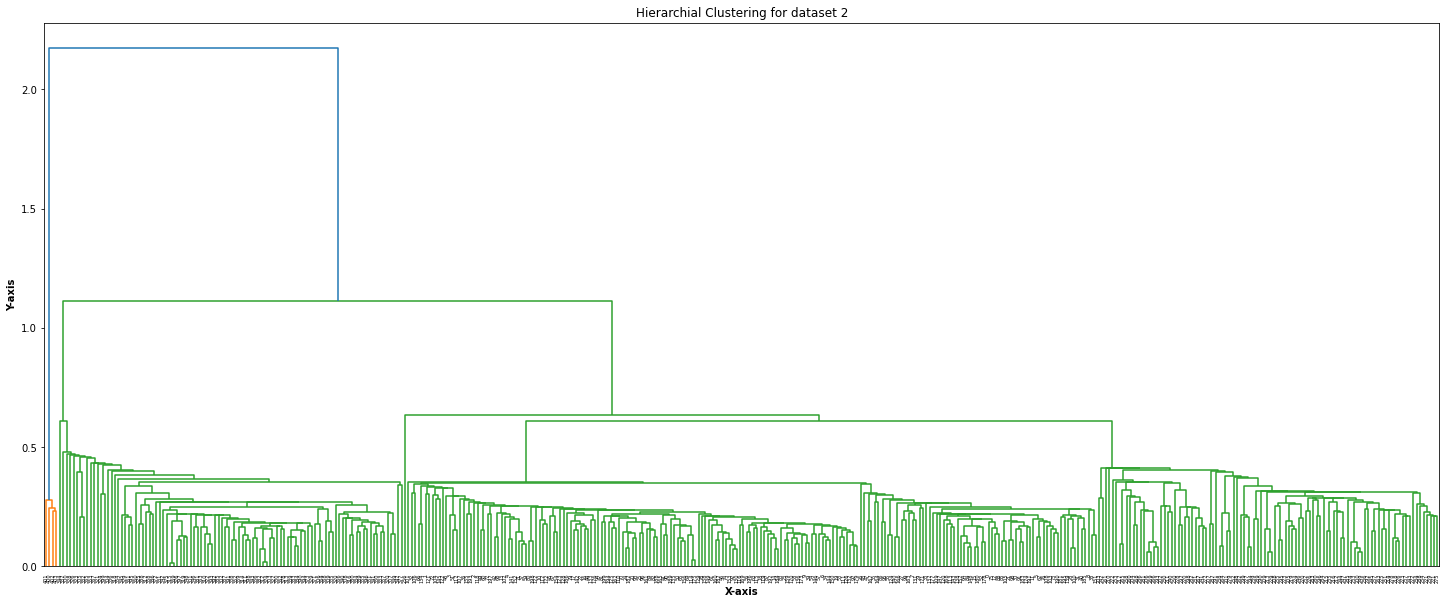

In [236]:
# hierarchical clustering algorithm for dataset2
Z = linkage(kmeans2, 'single')

# Cluster Dendrogram for data set 2
figure = plt.figure(figsize=(25, 10))
den = dendrogram(Z)
plt.title('Hierarchial Clustering for dataset 2')
plt.xlabel('X-axis', fontweight='bold')
plt.ylabel('Y-axis', fontweight='bold')
plt.show()

In [237]:
df2['Class'] = df2['Class']-1         ##reinitiating class to match with kmeans classification
df2

,Unnamed: 0,X,Y,C,Class
0,X1,3.277701,0.814082,0.326574,0
1,X2,0.387577,0.176780,0.888046,0
2,X3,0.268546,0.582963,0.080981,0
3,X4,2.031145,0.244597,0.643921,0
4,X5,0.188677,0.461280,0.496633,0
...,...,...,...,...,...
399,X400,3.248655,2.297291,3.388138,2
400,X,4.100000,5.100000,0.504558,3
401,X.1,3.900000,4.900000,0.941634,3
402,X.2,4.000000,5.000000,0.702123,3


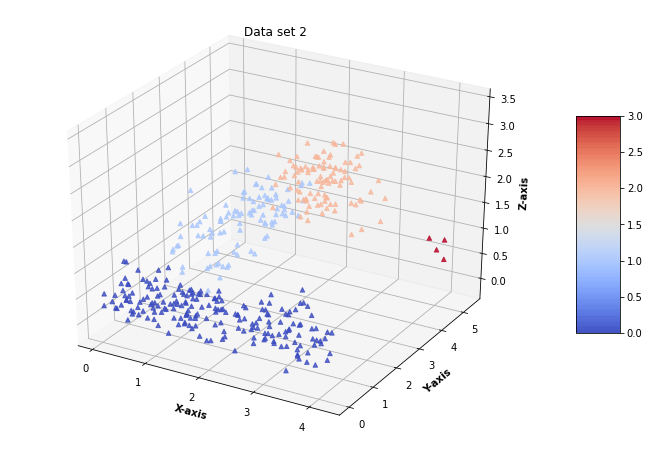

In [238]:
#Plot (2D or 3D) the data points for each dataset and color them according to the original class

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df2['X']
y = df2['Y']
z = df2['C']
original_class = df2['Class']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= original_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 2")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

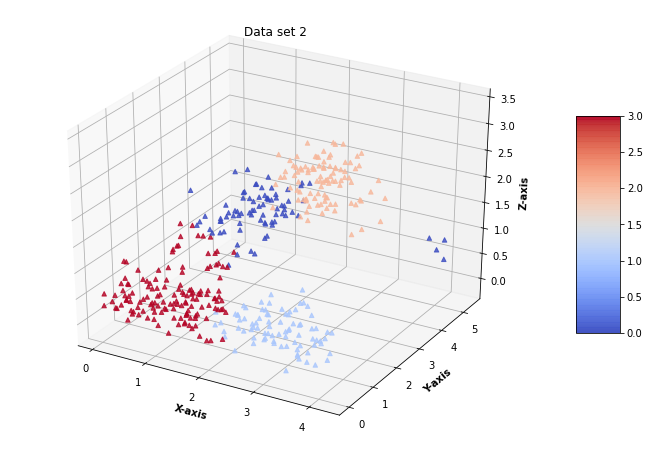

In [239]:
#Plot (2D or 3D) the data points for each dataset and color them according to the K-means clustering algorithm
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df2['X']
y = df2['Y']
z = df2['C']

new_class= kmeans.labels_

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= new_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 2")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

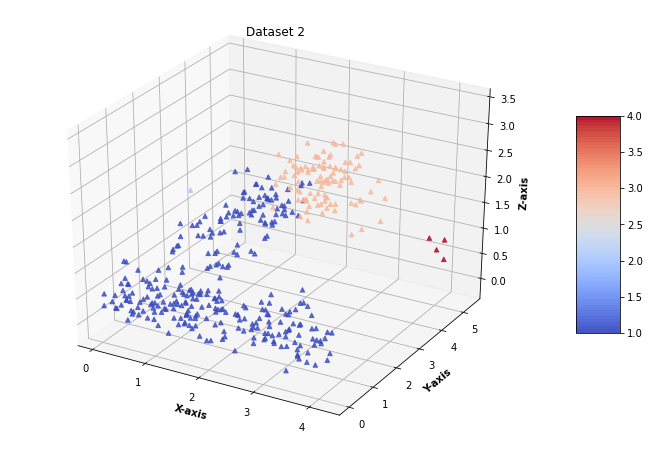

In [240]:
#Plot (2D or 3D) the data points for each dataset and color them according to the clustering algorithm
# Using Hierarchial Clustering

cut = cut_tree(Z, 4)

cut=[i+1 for i in cut]
cut = np.concatenate((cut))

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df2['X']
y = df2['Y']
z = df2['C']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= cut, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)
plt.title("Dataset 2")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

In [241]:
##accuracy score for k means
ac = metrics.accuracy_score(df2.iloc[:,4],new_class)

print('The Accuracy score for dataset 2 is:' + '' + str(ac))

The Accuracy score for dataset 2 is:0.24752475247524752


In [242]:
##F1 score calculation for k means
f1_score = metrics.f1_score(df2.iloc[:,4], kmeans.labels_, average='weighted')

print('The F1 score for dataset 2 is:' + str(f1_score))

The F1 score for dataset 2 is:0.24752475247524752


In [243]:
#accuracy score for hierarchial
ac = metrics.accuracy_score(df2.iloc[:,4],cut-1)

print('The Accuracy score for dataset 2 is:' + '' + str(ac))

The Accuracy score for dataset 2 is:0.754950495049505


In [244]:
##F1 score calculation for hierarchial
f1_score = metrics.f1_score(df2.iloc[:,4], cut-1, average='weighted')

print('The F1 score for dataset 2 is:' + str(f1_score))

The F1 score for dataset 2 is:0.6591604933226908


**Dataset 3**

In [245]:
df3

,Unnamed: 0,X1,X2,X3,Class
0,1,1.295428,0.050829,-0.385217,1
1,2,1.409178,-0.035191,-0.251980,1
2,3,1.096803,0.246365,-0.415011,1
3,4,1.463328,0.265354,-0.513488,1
4,5,1.603284,0.080577,-0.470257,1
...,...,...,...,...,...
395,396,0.795695,0.209456,1.880609,4
396,397,0.653127,-0.703156,1.549448,4
397,398,-0.726249,-0.103244,0.694300,4
398,399,0.808596,-0.492640,1.649370,4


In [253]:
##performing kmeans clustering with 4 clusters
kmeans3 = df3.iloc[:,1:4]
kmeans = KMeans(n_clusters = 4)
md3=kmeans.fit(kmeans3)

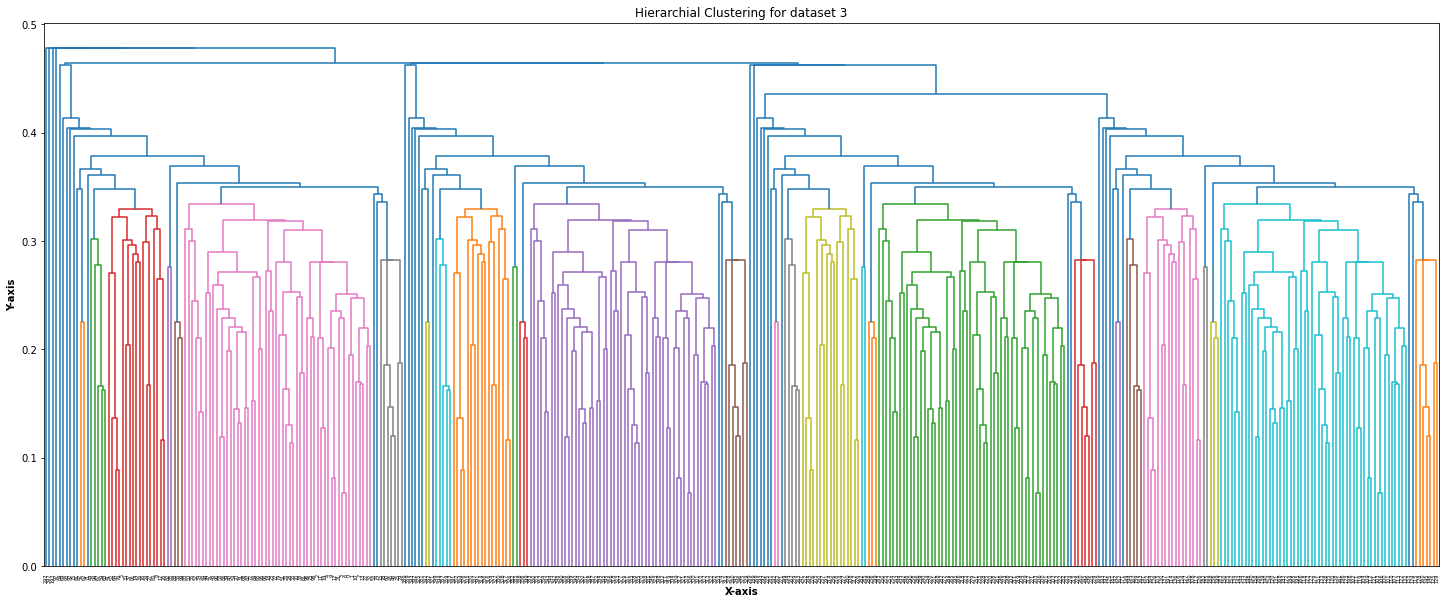

In [247]:
# hierarchical clustering algorithm for dataset3
Z = linkage(kmeans3, 'single')

# Cluster Dendrogram for data set 3
figure = plt.figure(figsize=(25, 10))
den = dendrogram(Z)
plt.title('Hierarchial Clustering for dataset 3')
plt.xlabel('X-axis', fontweight='bold')
plt.ylabel('Y-axis', fontweight='bold')
plt.show()

In [248]:
df3['Class'] = df3['Class']-1         ##reinitiating class to match with kmeans classification
df3

,Unnamed: 0,X1,X2,X3,Class
0,1,1.295428,0.050829,-0.385217,0
1,2,1.409178,-0.035191,-0.251980,0
2,3,1.096803,0.246365,-0.415011,0
3,4,1.463328,0.265354,-0.513488,0
4,5,1.603284,0.080577,-0.470257,0
...,...,...,...,...,...
395,396,0.795695,0.209456,1.880609,3
396,397,0.653127,-0.703156,1.549448,3
397,398,-0.726249,-0.103244,0.694300,3
398,399,0.808596,-0.492640,1.649370,3


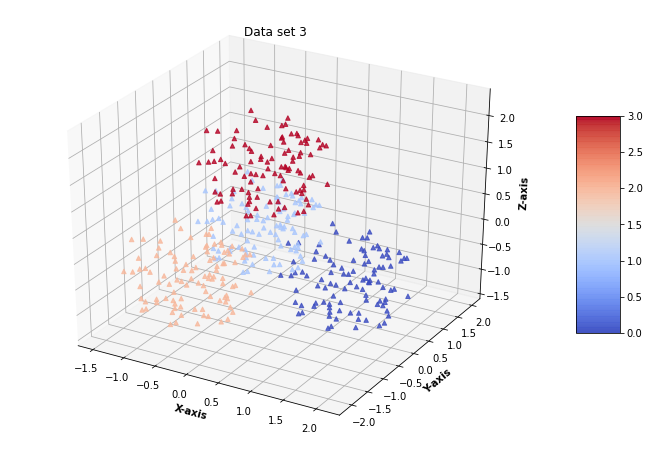

In [249]:
#Plot (2D or 3D) the data points for each dataset and color them according to the original class

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df3['X1']
y = df3['X2']
z = df3['X3']
original_class = df3['Class']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= original_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 3")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

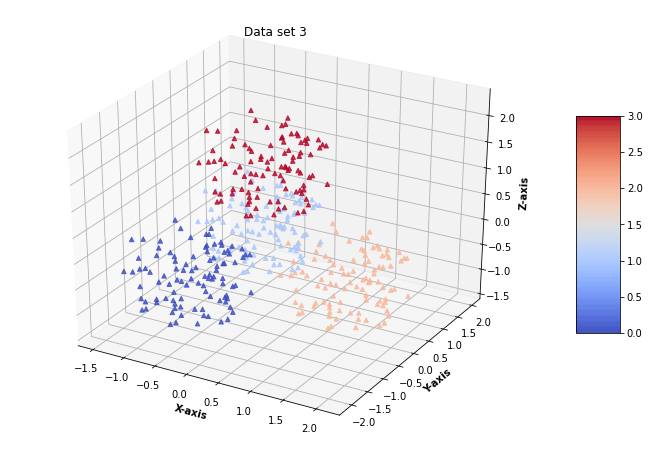

In [254]:
#Plot (2D or 3D) the data points for each dataset and color them according to the K-means clustering algorithm
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df3['X1']
y = df3['X2']
z = df3['X3']

new_class= kmeans.labels_

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= new_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 3")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

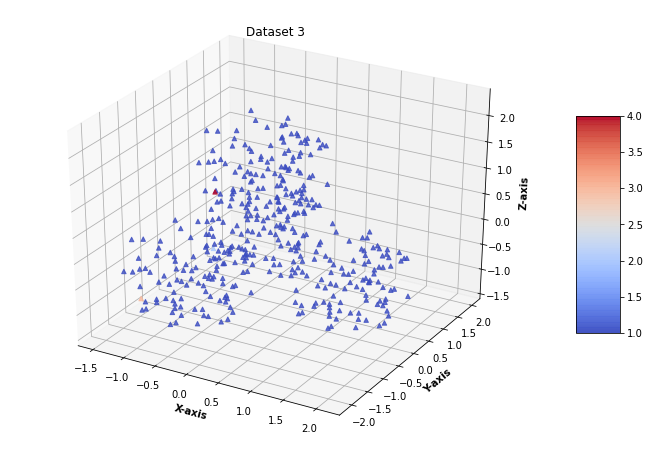

In [251]:
#Plot (2D or 3D) the data points for each dataset and color them according to the clustering algorithm
# Using Hierarchial Clustering

cut = cut_tree(Z, 4)

cut=[i+1 for i in cut]
cut = np.concatenate((cut))

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df3['X1']
y = df3['X2']
z = df3['X3']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= cut, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)
plt.title("Dataset 3")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

In [255]:
##accuracy score for k means
ac = metrics.accuracy_score(df3.iloc[:,4],new_class)

print('The Accuracy score for dataset 3 is:' + '' + str(ac))

The Accuracy score for dataset 3 is:0.5


In [257]:
##F1 score calculation for k means
f1_score = metrics.f1_score(df3.iloc[:,4], kmeans.labels_, average='weighted')

print('The F1 score for dataset 3 is:' + str(f1_score))

The F1 score for dataset 3 is:0.5


In [258]:
##accuracy score for hierarchial
ac = metrics.accuracy_score(df3.iloc[:,4],cut-1)

print('The Accuracy score for dataset 3 is:' + '' + str(ac))

The Accuracy score for dataset 3 is:0.2575


In [259]:
##F1 score calculation for hierarchial
f1_score = metrics.f1_score(df3.iloc[:,4], cut-1, average='weighted')

print('The F1 score for dataset 3 is:' + str(f1_score))

The F1 score for dataset 3 is:0.11545510687889717


**Dataset 4**

In [262]:
df4

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.45300,-0.8910,0.02300,1
1,2,0.65300,-0.8460,0.02110,1
2,3,0.39800,0.9130,-0.00139,1
3,4,0.09520,1.0500,0.00628,1
4,5,0.52400,-0.9410,0.03780,1
...,...,...,...,...,...
995,996,0.01520,0.0531,-0.36100,2
996,997,0.05160,0.6910,0.87500,2
997,998,-0.00511,1.3900,-0.94700,2
998,999,-0.06710,0.7140,0.88100,2


In [263]:
##performing kmeans clustering with 2 clusters
kmeans4 = df4.iloc[:,1:4]
kmeans = KMeans(n_clusters = 2)
md4=kmeans.fit(kmeans4)

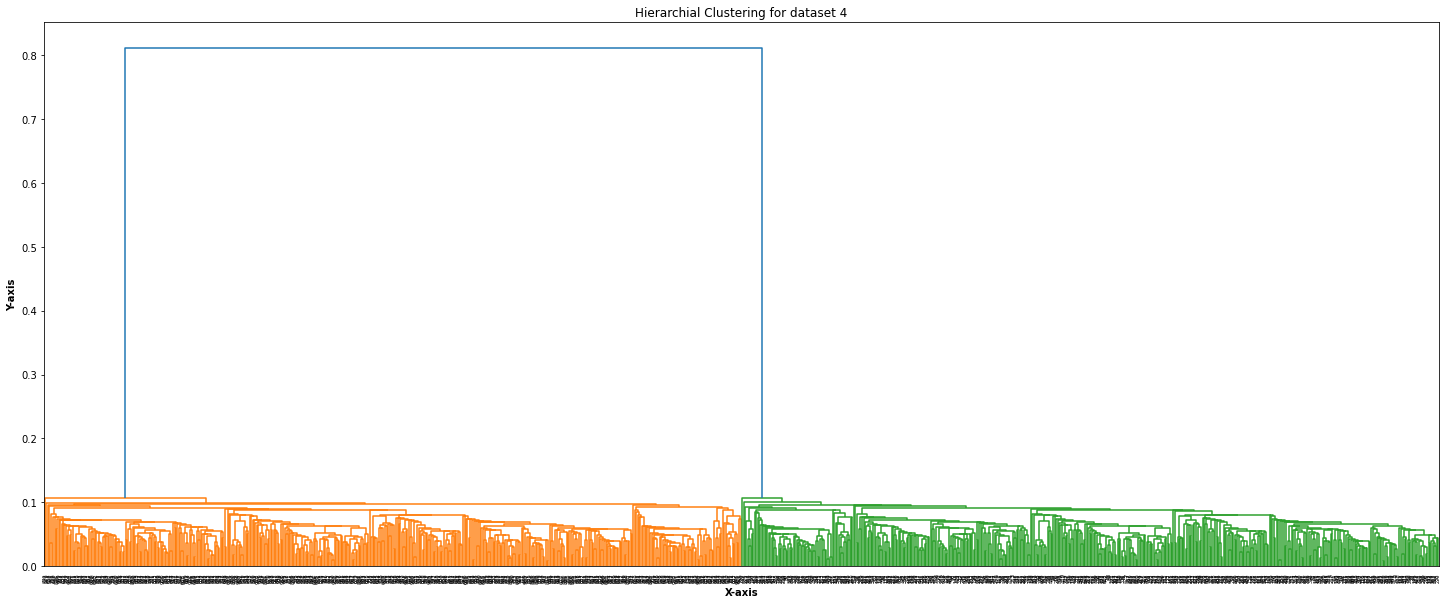

In [264]:
# hierarchical clustering algorithm for dataset4
Z = linkage(kmeans4, 'single')

# Cluster Dendrogram for data set 4
figure = plt.figure(figsize=(25, 10))
den = dendrogram(Z)
plt.title('Hierarchial Clustering for dataset 4')
plt.xlabel('X-axis', fontweight='bold')
plt.ylabel('Y-axis', fontweight='bold')
plt.show()

In [265]:
df4['Class'] = df4['Class']-1         ##reinitiating class to match with kmeans classification
df4

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.45300,-0.8910,0.02300,0
1,2,0.65300,-0.8460,0.02110,0
2,3,0.39800,0.9130,-0.00139,0
3,4,0.09520,1.0500,0.00628,0
4,5,0.52400,-0.9410,0.03780,0
...,...,...,...,...,...
995,996,0.01520,0.0531,-0.36100,1
996,997,0.05160,0.6910,0.87500,1
997,998,-0.00511,1.3900,-0.94700,1
998,999,-0.06710,0.7140,0.88100,1


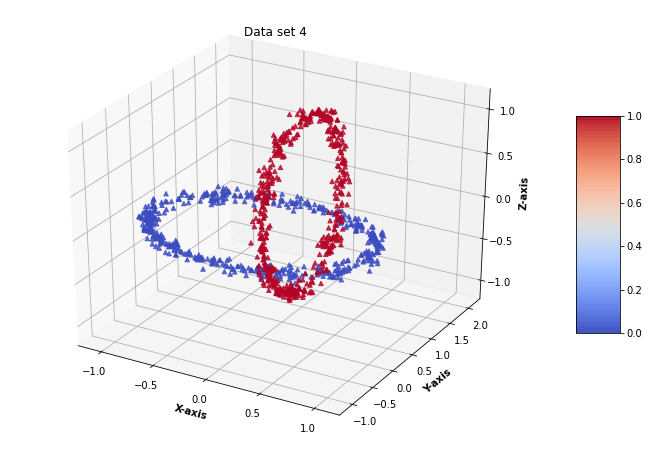

In [266]:
#Plot (2D or 3D) the data points for each dataset and color them according to the original class

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df4['X1']
y = df4['X2']
z = df4['X3']
original_class = df4['Class']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= original_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 4")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

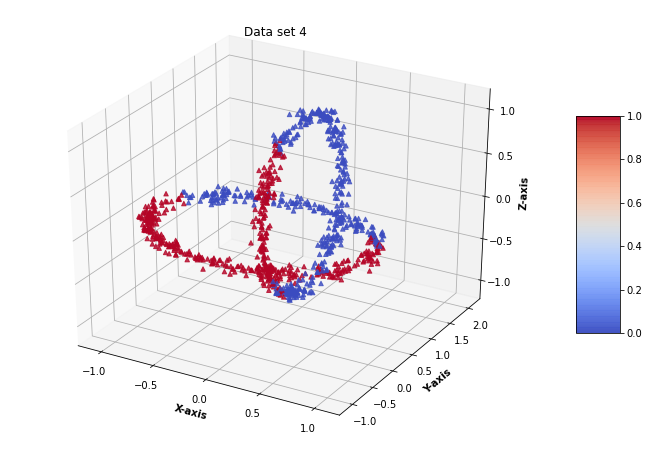

In [267]:
#Plot (2D or 3D) the data points for each dataset and color them according to the K-means clustering algorithm
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df4['X1']
y = df4['X2']
z = df4['X3']
new_class= kmeans.labels_

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= new_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 4")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

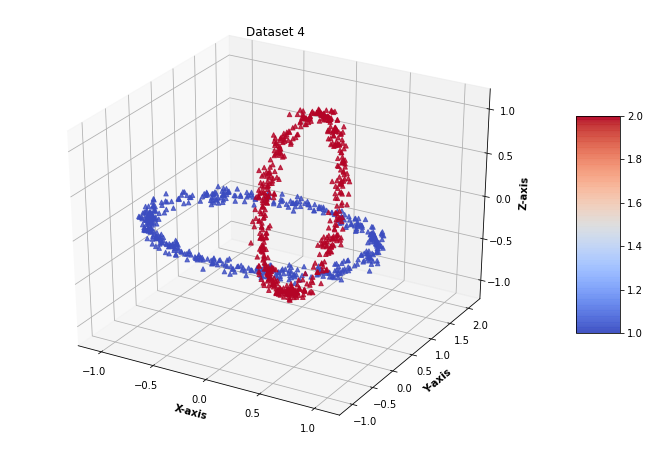

In [268]:
#Plot (2D or 3D) the data points for each dataset and color them according to the clustering algorithm
# Using Hierarchial Clustering

cut = cut_tree(Z, 2)

cut=[i+1 for i in cut]
cut = np.concatenate((cut))

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df4['X1']
y = df4['X2']
z = df4['X3']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= cut, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)
plt.title("Dataset 4")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

In [269]:
##accuracy score for k means
ac = metrics.accuracy_score(df4.iloc[:,4],new_class)

print('The Accuracy score for dataset 4 is:' + '' + str(ac))

The Accuracy score for dataset 4 is:0.347


In [270]:
##F1 score calculation for k means
f1_score = metrics.f1_score(df4.iloc[:,4], kmeans.labels_, average='macro')

print('The F1 score for dataset 4 is:' + str(f1_score))

The F1 score for dataset 4 is:0.346999346999347


In [271]:
# Accuracy calculation for hierarchial
ac = metrics.accuracy_score(df4.iloc[:,4],cut-1)

print('The Accuracy score for dataset 4 is:' + '' + str(ac))

The Accuracy score for dataset 4 is:1.0


In [272]:
##F1 score calculation for hierarchial
f1_score = metrics.f1_score(df4.iloc[:,4], cut-1, average='weighted')

print('The F1 score for dataset 4 is:' + str(f1_score))

The F1 score for dataset 4 is:1.0


**Dataset 5**

In [280]:
df5

,Unnamed: 0,X1,X2,X3,Class
0,1,-4.822490,-50.402170,4.020861,1
1,2,-44.460120,20.964670,-11.492060,1
2,3,50.001020,0.780748,9.134460,1
3,4,-41.699080,-22.310060,16.314120,1
4,5,4.425242,-4.666664,50.223740,1
...,...,...,...,...,...
795,796,-1.531027,0.681636,0.543271,2
796,797,0.500754,-1.848209,0.605654,2
797,798,1.089574,-0.246493,-3.355758,2
798,799,-1.907717,4.964502,2.098423,2


In [281]:
##performing kmeans clustering with 2 clusters
kmeans5 = df5.iloc[:,1:4]
kmeans = KMeans(n_clusters = 2)
md5=kmeans.fit(kmeans5)

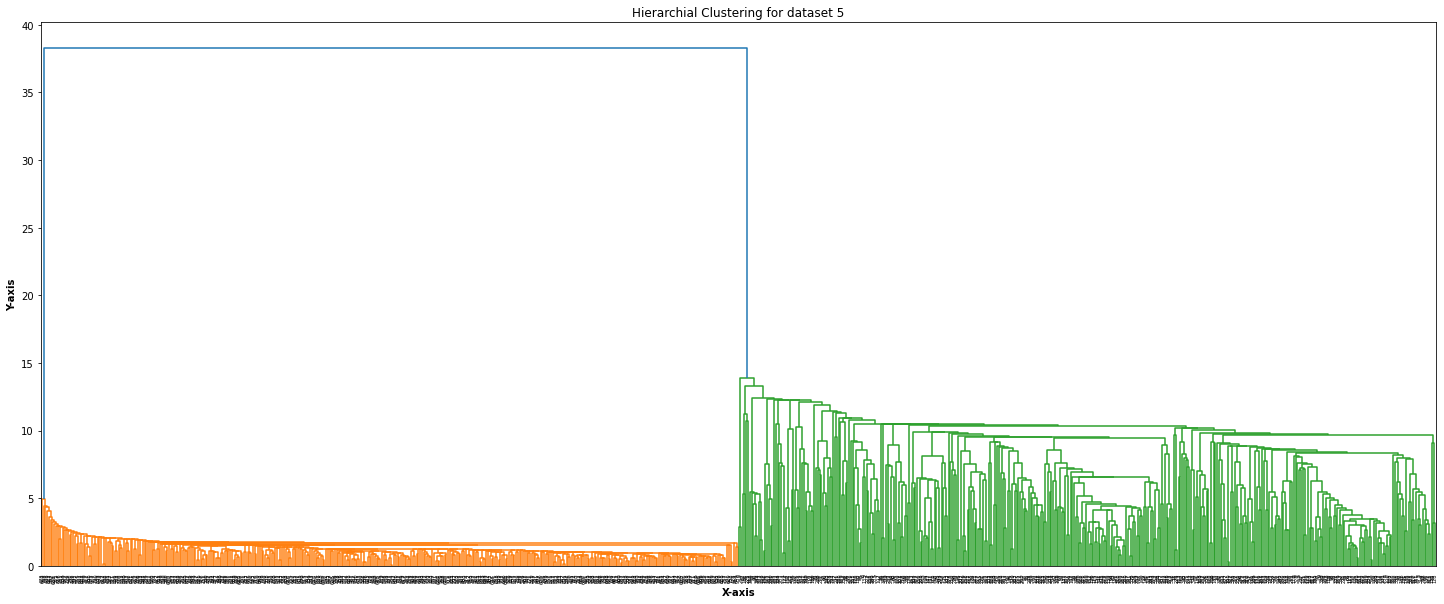

In [282]:
# hierarchical clustering algorithm for dataset 5
Z = linkage(kmeans5, 'single')

# Cluster Dendrogram for data set 5
figure = plt.figure(figsize=(25, 10))
den = dendrogram(Z)
plt.title('Hierarchial Clustering for dataset 5')
plt.xlabel('X-axis', fontweight='bold')
plt.ylabel('Y-axis', fontweight='bold')
plt.show()

In [283]:
df5['Class'] = df5['Class']-1         ##reinitiating class to match with kmeans classification
df5

,Unnamed: 0,X1,X2,X3,Class
0,1,-4.822490,-50.402170,4.020861,0
1,2,-44.460120,20.964670,-11.492060,0
2,3,50.001020,0.780748,9.134460,0
3,4,-41.699080,-22.310060,16.314120,0
4,5,4.425242,-4.666664,50.223740,0
...,...,...,...,...,...
795,796,-1.531027,0.681636,0.543271,1
796,797,0.500754,-1.848209,0.605654,1
797,798,1.089574,-0.246493,-3.355758,1
798,799,-1.907717,4.964502,2.098423,1


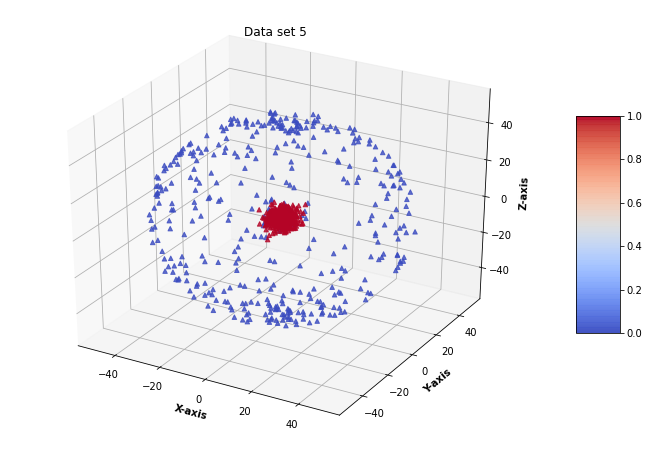

In [284]:
#Plot (2D or 3D) the data points for each dataset and color them according to the original class

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df5['X1']
y = df5['X2']
z = df5['X3']
original_class = df5['Class']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= original_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 5")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

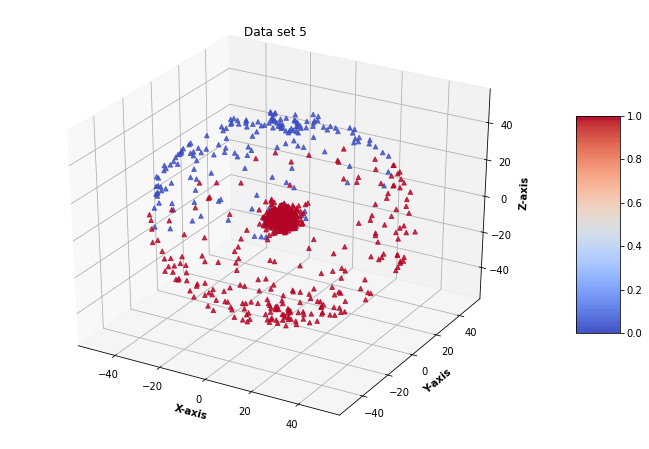

In [285]:
#Plot (2D or 3D) the data points for each dataset and color them according to the K-means clustering algorithm
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df5['X1']
y = df5['X2']
z = df5['X3']

new_class= kmeans.labels_

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= new_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 5")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

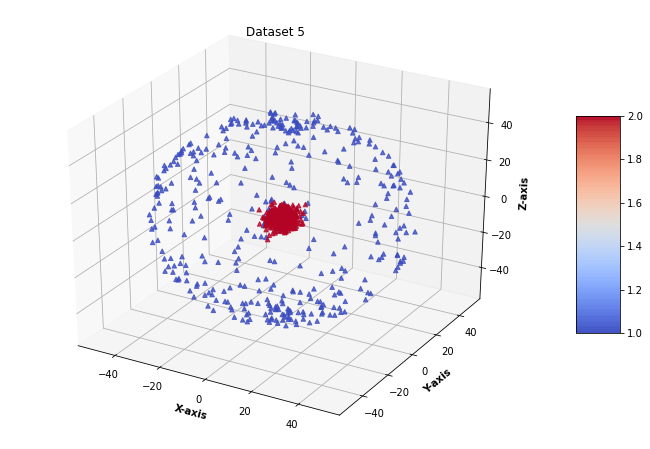

In [286]:
#Plot (2D or 3D) the data points for each dataset and color them according to the clustering algorithm
# Using Hierarchial Clustering

cut = cut_tree(Z, 2)

cut=[i+1 for i in cut]
cut = np.concatenate((cut))

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df5['X1']
y = df5['X2']
z = df5['X3']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= cut, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)
plt.title("Dataset 5")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

In [287]:
##accuracy score for k means
ac = metrics.accuracy_score(df5.iloc[:,4],new_class)

print('The Accuracy score for dataset 5 is:' + '' + str(ac))

The Accuracy score for dataset 5 is:0.71375


In [288]:
##F1 score calculation for k means
f1_score = metrics.f1_score(df5.iloc[:,4], kmeans.labels_, average='weighted')

print('The F1 score for dataset 5 is:' + str(f1_score))

The F1 score for dataset 5 is:0.6882015252936301


In [289]:
# Accuracy calculation for hierarchial
ac = metrics.accuracy_score(df5.iloc[:,4],cut-1)

print('The Accuracy score for dataset 5 is:' + '' + str(ac))

The Accuracy score for dataset 5 is:1.0


In [290]:
##F1 score calculation for hierarchial
f1_score = metrics.f1_score(df5.iloc[:,4], cut-1, average='weighted')

print('The F1 score for dataset 5 is:' + str(f1_score))

The F1 score for dataset 5 is:1.0


**Dataset 6**

In [291]:
df6

,Unnamed: 0,X1,X2,Class
0,1,1.388261,2.076096,1
1,2,2.177247,3.102304,1
2,3,0.378645,5.307610,1
3,4,3.681732,1.622681,1
4,5,2.462861,2.777897,1
...,...,...,...,...
4091,4092,0.909687,0.375763,2
4092,4093,2.698381,0.511262,2
4093,4094,1.078797,1.526153,2
4094,4095,1.974889,-0.649343,2


In [300]:
##performing kmeans clustering with 2 clusters
kmeans6 = df6.iloc[:,1:3]
kmeans = KMeans(n_clusters = 2)
md6=kmeans.fit(kmeans6)

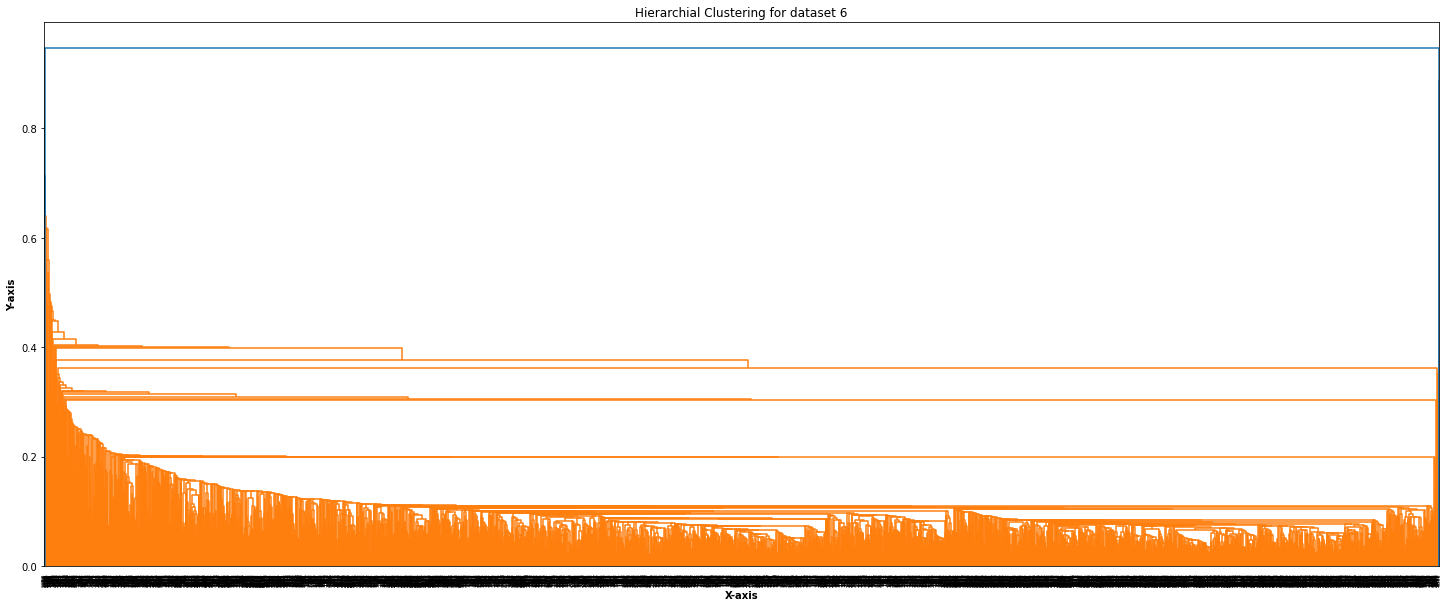

In [293]:
# hierarchical clustering algorithm for dataset 6
Z = linkage(kmeans6, 'single')

# Cluster Dendrogram for dataset 6
figure = plt.figure(figsize=(25, 10))
den = dendrogram(Z)
plt.title('Hierarchial Clustering for dataset 6')
plt.xlabel('X-axis', fontweight='bold')
plt.ylabel('Y-axis', fontweight='bold')
plt.show()

In [294]:
df6['Class'] = df6['Class']-1         ##reinitiating class to match with kmeans classification
df6

,Unnamed: 0,X1,X2,Class
0,1,1.388261,2.076096,0
1,2,2.177247,3.102304,0
2,3,0.378645,5.307610,0
3,4,3.681732,1.622681,0
4,5,2.462861,2.777897,0
...,...,...,...,...
4091,4092,0.909687,0.375763,1
4092,4093,2.698381,0.511262,1
4093,4094,1.078797,1.526153,1
4094,4095,1.974889,-0.649343,1


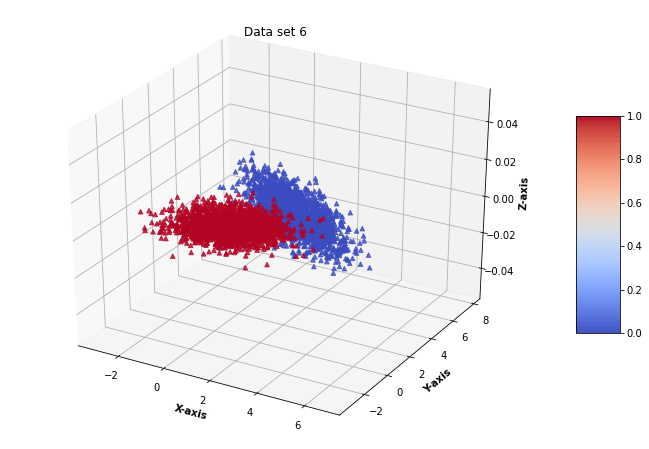

In [295]:
#Plot (2D or 3D) the data points for each dataset and color them according to the original class

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df6['X1']
y = df6['X2']
original_class = df6['Class']

plot = ax.scatter3D(x, y,alpha = 0.8,c= original_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 6")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

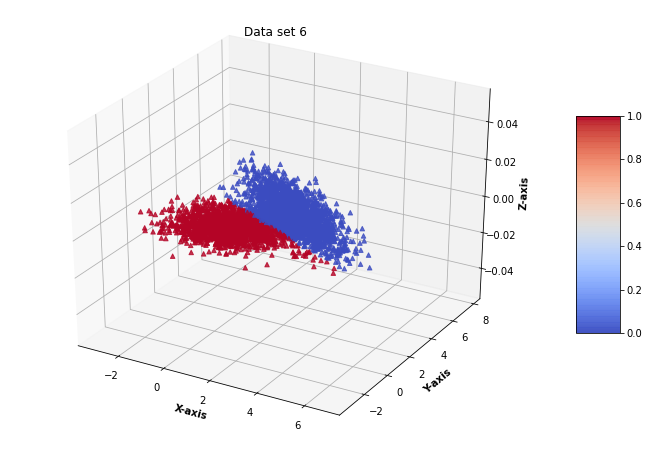

In [301]:
#Plot (2D or 3D) the data points for each dataset and color them according to the K-means clustering algorithm
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df6['X1']
y = df6['X2']

new_class= kmeans.labels_

plot = ax.scatter3D(x, y,alpha = 0.8,c= new_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 6")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

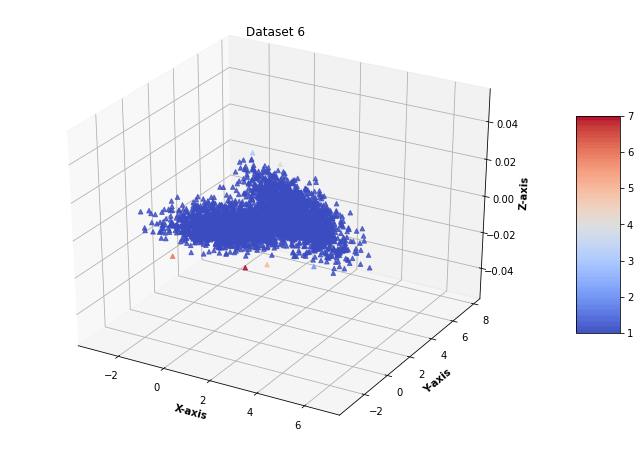

In [297]:
#Plot (2D or 3D) the data points for each dataset and color them according to the clustering algorithm
# Using Hierarchial Clustering

cut = cut_tree(Z, 7)

cut=[i+1 for i in cut]
cut = np.concatenate((cut))

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df6['X1']
y = df6['X2']

plot = ax.scatter3D(x, y, alpha = 0.8,c= cut, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)
plt.title("Dataset 6")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

In [302]:
##accuracy score for k means
ac = metrics.accuracy_score(df6.iloc[:,3],new_class)

print('The Accuracy score for dataset 6 is:' + '' + str(ac))

The Accuracy score for dataset 6 is:0.951416015625


In [304]:
##F1 score calculation for k means
f1_score = metrics.f1_score(df6.iloc[:,3], kmeans.labels_, average='weighted')

print('The F1 score for dataset 6 is:' + str(f1_score))

The F1 score for dataset 6 is:0.9513828386139447


In [306]:
##accuracy score for hierarchial
ac = metrics.accuracy_score(df6.iloc[:,3],cut-1)

print('The Accuracy score for dataset 6 is:' + '' + str(ac))

The Accuracy score for dataset 6 is:0.499267578125


In [307]:
##F1 score calculation for hierarchial
f1_score = metrics.f1_score(df6.iloc[:,3], cut-1, average='weighted')

print('The F1 score for dataset 6 is:' + str(f1_score))

The F1 score for dataset 6 is:0.3331704138155751


**Dataset 7**

In [308]:
df7

,Unnamed: 0,X1,X2,Class
0,1,-3.000000,-3.000000,5
1,2,-3.000000,3.000000,4
2,3,3.000000,-3.000000,6
3,4,3.000000,3.000000,3
4,5,-0.417091,0.114782,1
...,...,...,...,...
765,766,-1.604434,-1.118861,2
766,767,-3.050000,-3.050000,5
767,768,-3.050000,2.950000,4
768,769,2.950000,-3.050000,6


In [309]:
##performing kmeans clustering with 6 clusters
kmeans7 = df7.iloc[:,1:3]
kmeans = KMeans(n_clusters = 6)
md7=kmeans.fit(kmeans7)

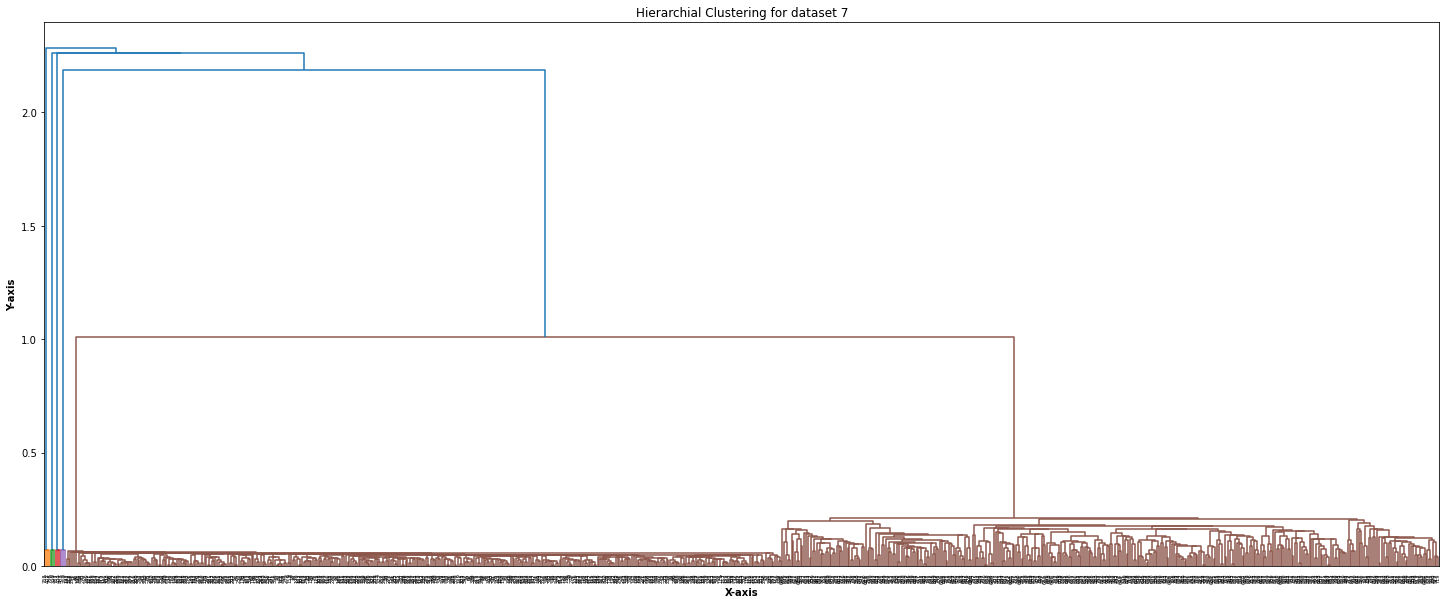

In [310]:
# hierarchical clustering algorithm for dataset 7
Z = linkage(kmeans7, 'single')

# Cluster Dendrogram for dataset 7
figure = plt.figure(figsize=(25, 10))
den = dendrogram(Z)
plt.title('Hierarchial Clustering for dataset 7')
plt.xlabel('X-axis', fontweight='bold')
plt.ylabel('Y-axis', fontweight='bold')
plt.show()

In [311]:
df7['Class'] = df7['Class']-1         ##reinitiating class to match with kmeans classification
df7['Class'].nunique()

6

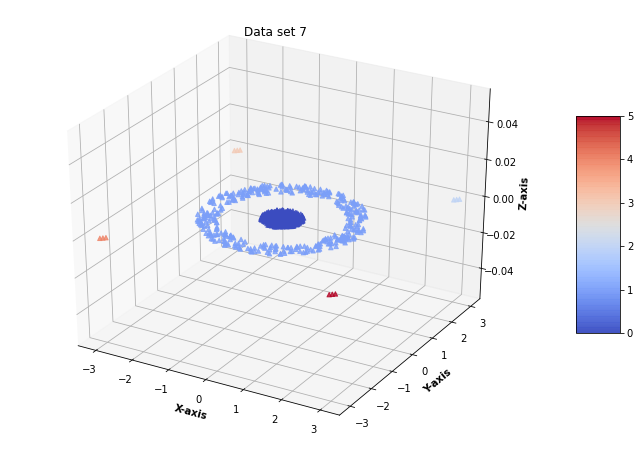

In [313]:
#Plot (2D or 3D) the data points for each dataset and color them according to the original class

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df7['X1']
y = df7['X2']
original_class = df7['Class']

plot = ax.scatter3D(x, y,alpha = 0.8,c= original_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 7")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

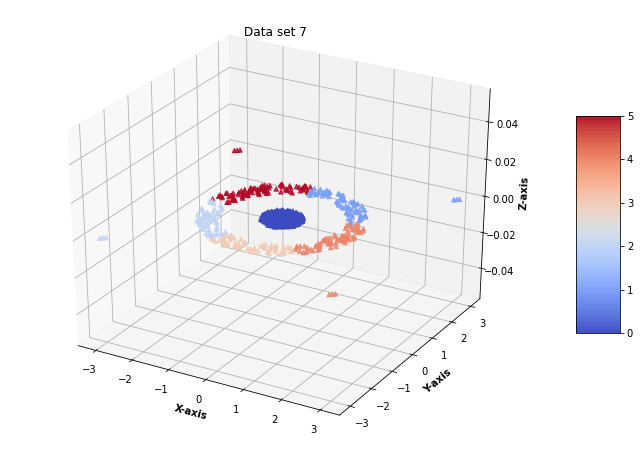

In [314]:
#Plot (2D or 3D) the data points for each dataset and color them according to the K-means clustering algorithm
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df7['X1']
y = df7['X2']
new_class= kmeans.labels_

plot = ax.scatter3D(x, y, alpha = 0.8,c= new_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 7")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

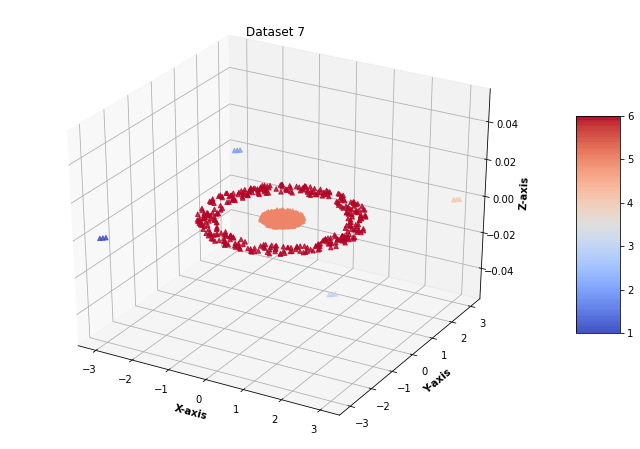

In [320]:
#Plot (2D or 3D) the data points for each dataset and color them according to the clustering algorithm
# Using Hierarchial Clustering

cut = cut_tree(Z, 6)

cut=[i+1 for i in cut]
cut = np.concatenate((cut))

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df7['X1']
y = df7['X2']

plot = ax.scatter3D(x, y, alpha = 0.8,c= cut, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)
plt.title("Dataset 7")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

In [316]:
##accuracy score for k means
ac = metrics.accuracy_score(df7.iloc[:,3],new_class)

print('The Accuracy score for dataset 7 is:' + '' + str(ac))

The Accuracy score for dataset 7 is:0.612987012987013


In [317]:
##F1 score calculation for k means
f1_score = metrics.f1_score(df7.iloc[:,3], kmeans.labels_, average='weighted')

print('The F1 score for dataset 7 is:' + str(f1_score))

The F1 score for dataset 7 is:0.676869631497171


In [321]:
##accuracy score for hierarchial
ac = metrics.accuracy_score(df7.iloc[:,3],cut-1)

print('The Accuracy score for dataset 7 is:' + '' + str(ac))

The Accuracy score for dataset 7 is:0.0


In [322]:
##F1 score calculation for hierarchial
f1_score = metrics.f1_score(df7.iloc[:,3], cut-1, average='weighted')

print('The F1 score for dataset 7 is:' + str(f1_score))

The F1 score for dataset 7 is:0.0


**Dataset 8**

In [370]:
df8

,Unnamed: 0,X1,X2,X3,Class
0,1,0.000000,0.000000,1.00000,1
1,2,0.000000,0.052336,0.99863,1
2,3,0.049774,0.016173,0.99863,1
3,4,0.030762,-0.042341,0.99863,1
4,5,-0.030762,-0.042341,0.99863,1
...,...,...,...,...,...
3997,3998,0.049774,-0.016173,-0.99863,1
3998,3999,0.000000,-0.052336,-0.99863,1
3999,4000,-0.049774,-0.016173,-0.99863,1
4000,4001,-0.030762,0.042341,-0.99863,1


In [371]:
##performing kmeans clustering with 1 cluster
kmeans8 = df8.iloc[:,1:4]
kmeans = KMeans(n_clusters = 1)
md8=kmeans.fit(kmeans8)

In [407]:
df8

,Unnamed: 0,X1,X2,X3,Class
0,1,0.000000,0.000000,1.00000,1
1,2,0.000000,0.052336,0.99863,1
2,3,0.049774,0.016173,0.99863,1
3,4,0.030762,-0.042341,0.99863,1
4,5,-0.030762,-0.042341,0.99863,1
...,...,...,...,...,...
3997,3998,0.049774,-0.016173,-0.99863,1
3998,3999,0.000000,-0.052336,-0.99863,1
3999,4000,-0.049774,-0.016173,-0.99863,1
4000,4001,-0.030762,0.042341,-0.99863,1


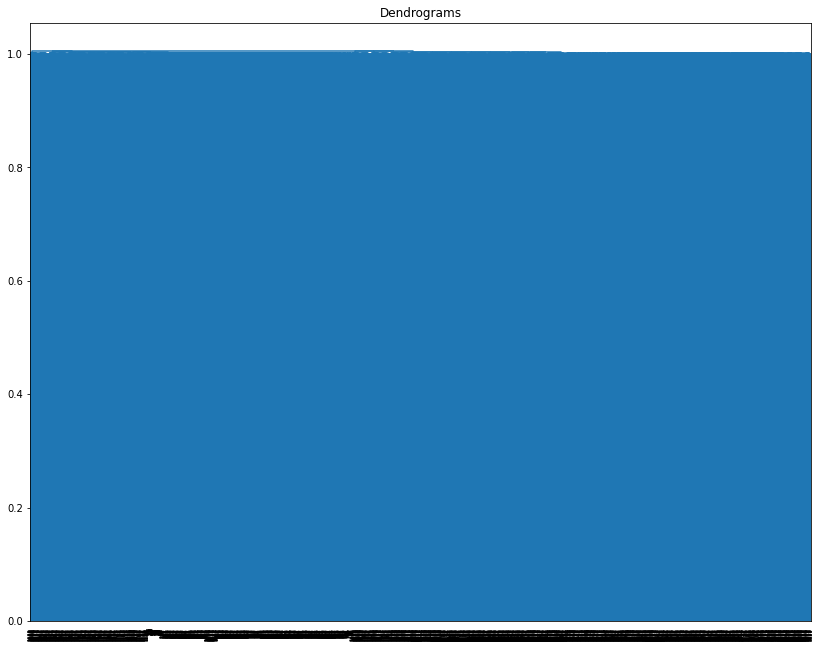

In [405]:
from scipy.cluster import hierarchy
plt.figure(figsize=(14, 11))  
plt.title("Dendrograms")  
dend = hierarchy.dendrogram(hierarchy.linkage(df8.iloc[:,0:2], method = 'single'))

In [357]:
df8['Class'] = df8['Class']-1         ##reinitiating class to match with kmeans classification
df8

,Unnamed: 0,X1,X2,X3,Class
0,1,0.000000,0.000000,1.00000,0
1,2,0.000000,0.052336,0.99863,0
2,3,0.049774,0.016173,0.99863,0
3,4,0.030762,-0.042341,0.99863,0
4,5,-0.030762,-0.042341,0.99863,0
...,...,...,...,...,...
3997,3998,0.049774,-0.016173,-0.99863,0
3998,3999,0.000000,-0.052336,-0.99863,0
3999,4000,-0.049774,-0.016173,-0.99863,0
4000,4001,-0.030762,0.042341,-0.99863,0


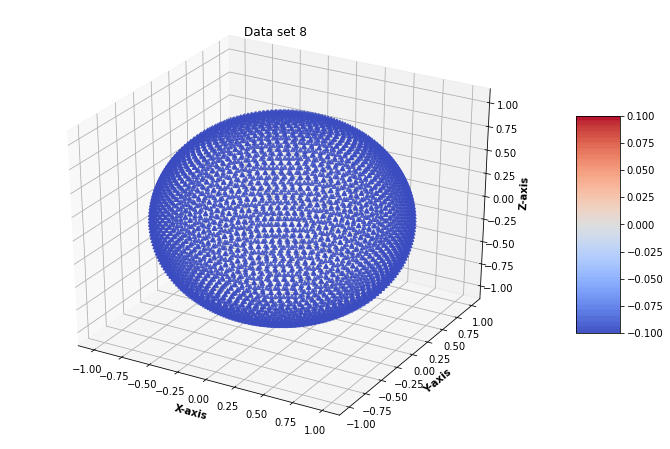

In [358]:
#Plot (2D or 3D) the data points for each dataset and color them according to the original class

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df8['X1']
y = df8['X2']
z = df8['X3']
original_class = df8['Class']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= original_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 8")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

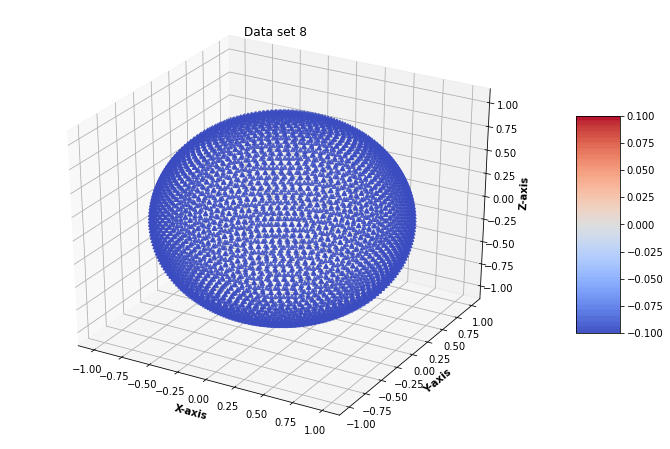

In [359]:
#Plot (2D or 3D) the data points for each dataset and color them according to the K-means clustering algorithm
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df8['X1']
y = df8['X2']
z = df8['X3']

new_class= kmeans.labels_

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= new_class, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)

plt.title("Data set 8")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

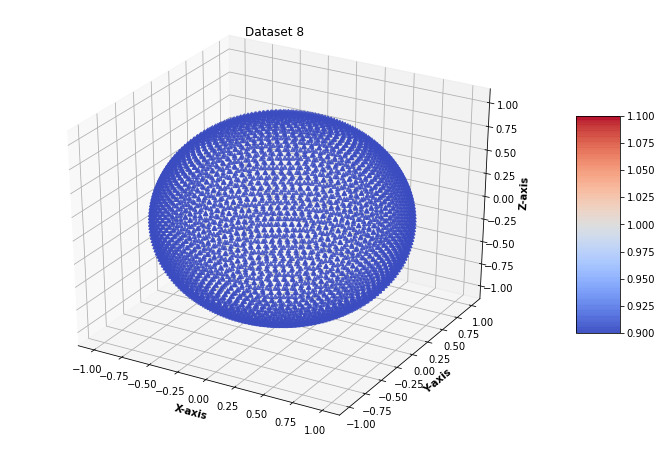

In [331]:
#Plot (2D or 3D) the data points for each dataset and color them according to the clustering algorithm
# Using Hierarchial Clustering

cut = cut_tree(Z, 1)

cut=[i+1 for i in cut]
cut = np.concatenate((cut))

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

x = df8['X1']
y = df8['X2']
z = df8['X3']

plot = ax.scatter3D(x, y, z,alpha = 0.8,c= cut, cmap = "coolwarm",marker ='^')
fig.colorbar(plot, shrink = 0.5, aspect = 5)
plt.title("Dataset 8")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

In [360]:
##accuracy score for k means
ac = metrics.accuracy_score(df8.iloc[:,4],new_class)

print('The Accuracy score for dataset 8 is:' + '' + str(ac))

The Accuracy score for dataset 8 is:1.0


In [361]:
##F1 score calculation for k means
f1_score = metrics.f1_score(df8.iloc[:,4], kmeans.labels_, average='weighted')

print('The F1 score for dataset 8 is:' + str(f1_score))

The F1 score for dataset 8 is:1.0


In [362]:
##accuracy score for hierarchial
ac = metrics.accuracy_score(df8.iloc[:,4],cut-1)

print('The Accuracy score for dataset 8 is:' + '' + str(ac))

The Accuracy score for dataset 8 is:1.0


In [363]:
##F1 score calculation for hierarchial
f1_score = metrics.f1_score(df8.iloc[:,4], cut-1, average='weighted')

print('The F1 score for dataset 8 is:' + str(f1_score))

The F1 score for dataset 8 is:1.0


**Task 2**

In [397]:
#Reading the csv file
dwi = pd.read_csv('World Indicators.csv')
dwi.index = np.arange(1, len(dwi)+1)

#dropping columns that has maximum null values 
dwi = dwi.drop(columns=['Energy Usage', 'Lending Interest'], axis =1)

#removing records that has missing values 
dwi=dwi. dropna()

#checking if there are any duplicate records
duplicate=dwi[dwi.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Birth Rate, Business Tax Rate, Days to Start Business, GDP, Health Exp % GDP, Health Exp/Capita, Hours to do Tax, Infant Mortality Rate, Internet Usage, Life Expectancy Female, Life Expectancy Male, Mobile Phone Usage, Population 0-14, Population 15-64, Population 65+, Population Urban, Region, Country]
Index: []


In [398]:
##removing speical characters % $ , in the data fields
dwi['Business Tax Rate'] = dwi['Business Tax Rate'].str.replace('%', '', regex=True)
dwi['GDP'] = dwi['GDP'].str.replace('$', '', regex=True)
dwi['GDP'] = dwi['GDP'].str.replace(',', '', regex=True)
dwi['Health Exp/Capita'] = dwi['Health Exp/Capita'].str.replace('$', '', regex=True)
dwi['Health Exp/Capita'] = dwi['Health Exp/Capita'].str.replace(',', '', regex=True)

## converting the data to numerical value data type
dwi['GDP'] = dwi['GDP'].astype(float)
dwi['Business Tax Rate'] = dwi['Business Tax Rate'].astype(float)
dwi['Health Exp/Capita'] = dwi['Health Exp/Capita'].astype(float)

In [379]:
##dataset scaling by using standard scaling method
num = dwi.iloc[ : ,0:16]                                    #getting numeric fields
stdsca = StandardScaler()                                 
scaled = stdsca.fit_transform(num)
scaled_data = pd.DataFrame(scaled, columns=num.columns)     ##converting numpy array into df
scaled_data.index = np.arange(1, len(scaled_data)+1)        ##starting index from 1

In [399]:
# Applying Kmeans algorithm with silloutte analysis to get silloutte scores 
km = KMeans()                                                                                    
km.fit(scaled_data)

sil_scores = []

range_n_clusters = list (range(2,11))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_data)
    centers = clusterer.cluster_centers_

    sil_score = silhouette_score(scaled_data, preds)
    sil_scores.append(sil_score)

In [408]:
# Elbow plot
result=[]
wcss=[]
for i in range(1,11):
  mdl=KMeans(n_clusters=i)
  mdl.fit(scaled_data)
  result.append(i)
  wcss.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


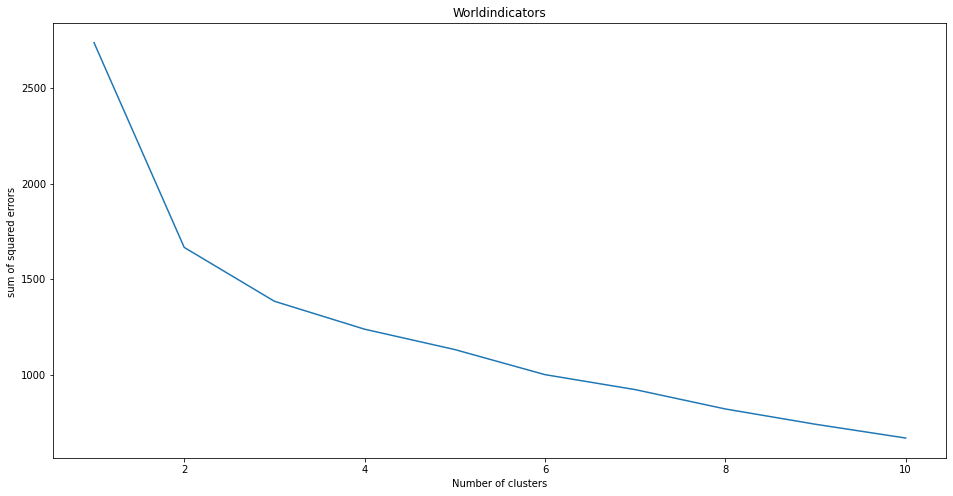

In [409]:
sns.lineplot(result,wcss)
plt.title('Worldindicators')
plt.xlabel('Number of clusters')
plt.ylabel('sum of squared errors ')
plt.show()

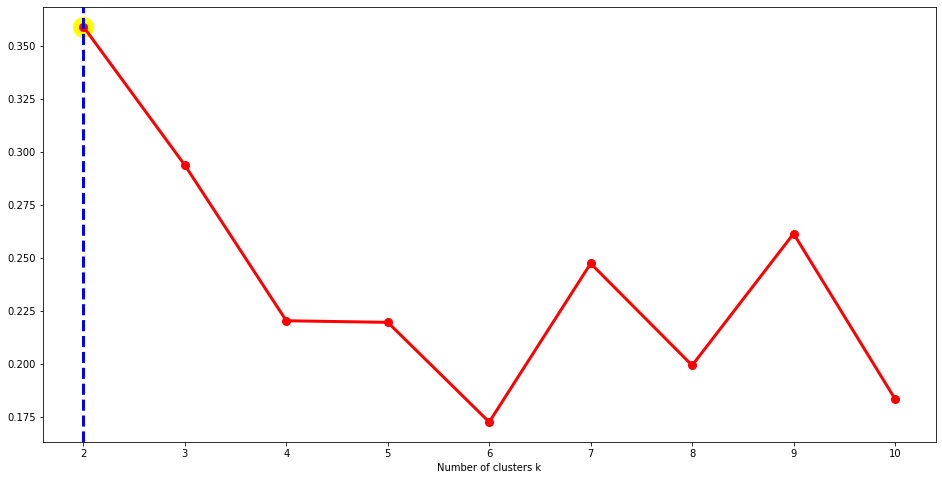

In [400]:
# Finding optimal number of clusters using kmeans algorithm using silhouette score.                     
plt.plot(range(2,11), sil_scores, "bo-", color='red', linewidth=3, markersize=8, label='Silhouette Curve')

k = np.argmax(sil_scores)+2

plt.axvline(x=k, linestyle='--', c='blue', linewidth=3, label='optimal({})'.format(k))
plt.scatter(k, sil_scores[k-2], c='yellow', s=400)
plt.xlabel('Number of clusters k')
plt.show()

In [383]:
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [384]:
##Performing internal validation by finding CH Ratio

km = KMeans(n_clusters= 2) #from the above plot (k= 2)
label = km.fit_predict(scaled_data)

ch_ratio = chs(scaled_data, label)
print('CH Ratio:' + str(ch_ratio))

CH Ratio:108.54562732127647


In [387]:
##Performing Internal validation by finding Dunn Index value

from validclust import dunn

# Kmeans clustering by choosing k = 2
optimal_model=KMeans(n_clusters=2, random_state=30).fit(scaled_data)

labels=optimal_model.labels_
labels=[i+1 for i in labels]

dist_cohesive = metrics.pairwise_distances(scaled_data)

dunn_cohesive = dunn(dist_cohesive,  labels)

print('Dunn Index of Cohesive Data: '+ str(dunn_cohesive))

Dunn Index of Cohesive Data: 0.06697056305227665


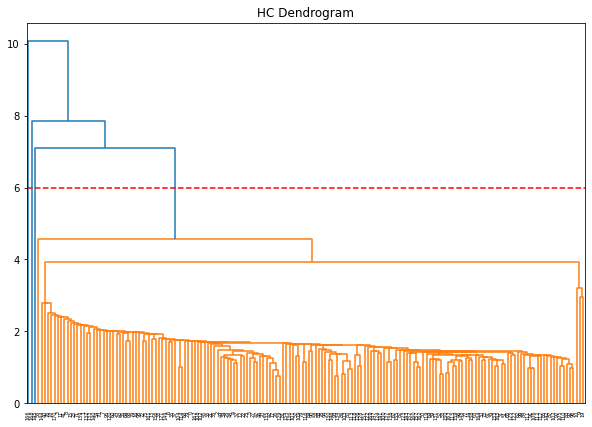

In [388]:
##hierarchical clustering algorithm depicted with Dendogram

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("HC Dendrogram") 

dend = shc.dendrogram(shc.linkage(scaled_data, method='single'))      ##using single method of linkage
plt.axhline(y=6, color='r', linestyle='--')

In [389]:
##Performing internal validation by finding CH Ratio

km = KMeans(n_clusters= 4) #from the above plot (k= 4)
label = km.fit_predict(scaled_data)

ch_ratio = chs(scaled_data, label)
print('CH Ratio:' + str(ch_ratio))

CH Ratio:67.30635334467502


In [391]:
# Hierarchical clustering by choosing k = 4 as the horizontal line cuts at 4 points 
x=shc.linkage(scaled_data, method='single')
cut = cut_tree(x, 4)

cut=[i+1 for i in cut]
cut = np.concatenate((cut))

# Internal validation metrics to report the cluster quality using Dunn Index
dist_cohesive = metrics.pairwise_distances(scaled_data)

dunn_cohesive = dunn(dist_cohesive,  cut)

print('DI : '+ str(dunn_cohesive))

DI Cohesive Data: 0.5167181172707642


From the above calculated scores, it is evident that kmeans is a better clustering technique. 

In [392]:
# Adding k values for Kmeans clustering  
dwi['Cluster'] = labels

# Adding k values for Hierarchical clustering
dwi['cut'] = cut

# a detailed list of all the groups and the countries included within the groups using k values for Kmeans clustering  
result = dwi.sort_values(by=['Cluster'])
result = result[['Country','Cluster']]
result
print(result.to_string())

                            Country  Cluster
1                           Algeria        1
115                  Macedonia, FYR        1
116                           Malta        1
117                         Moldova        1
119                      Montenegro        1
120                     Netherlands        1
121                          Norway        1
122                          Poland        1
123                        Portugal        1
124                         Romania        1
125              Russian Federation        1
127                          Serbia        1
128                 Slovak Republic        1
129                        Slovenia        1
130                           Spain        1
131                          Sweden        1
114                      Luxembourg        1
113                       Lithuania        1
111                          Latvia        1
109                           Italy        1
91                          Belarus        1
92        

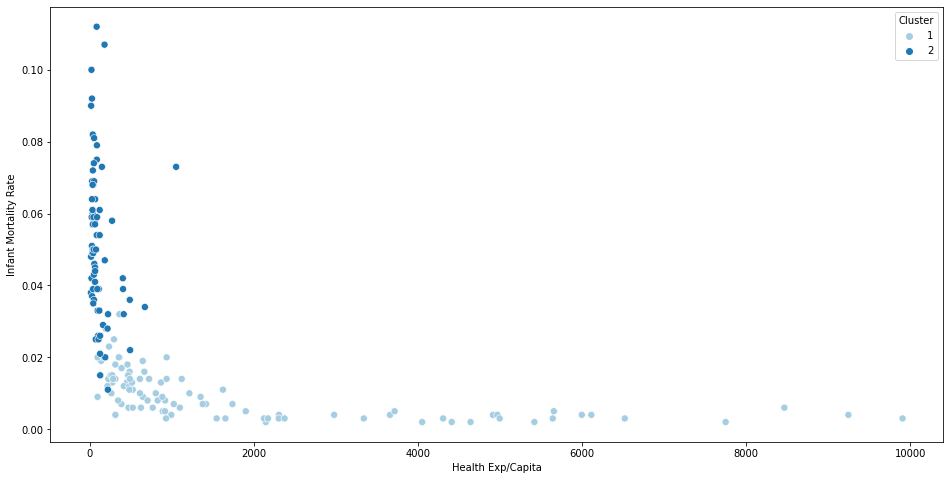

In [393]:
# Health Exp/Capita vs Infant Mortality rate
sns.scatterplot(data=dwi, x = 'Health Exp/Capita', y = 'Infant Mortality Rate', s=50, hue='Cluster', palette = "Paired")
plt.show()

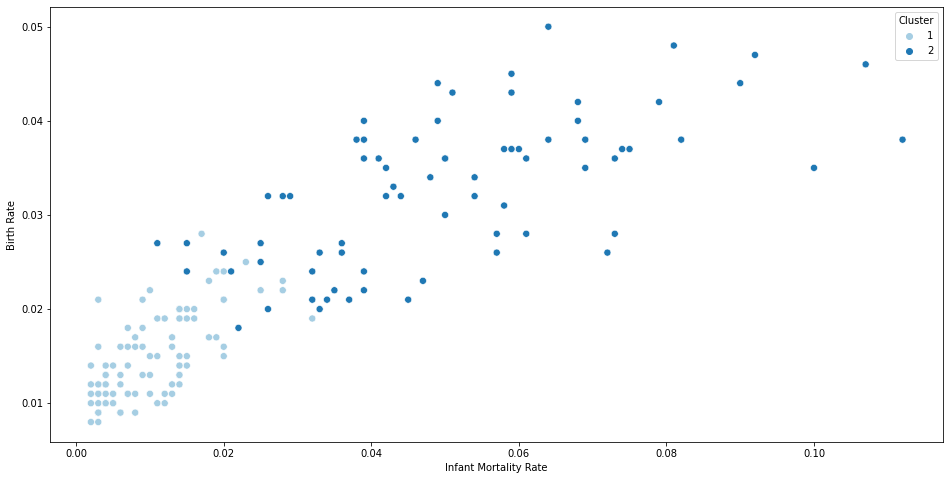

In [394]:
# Life Expectancy Male vs Birth Rate
sns.scatterplot(data=dwi, x = 'Infant Mortality Rate', y = 'Birth Rate', s=50, hue='Cluster', palette = "Paired")
plt.show()

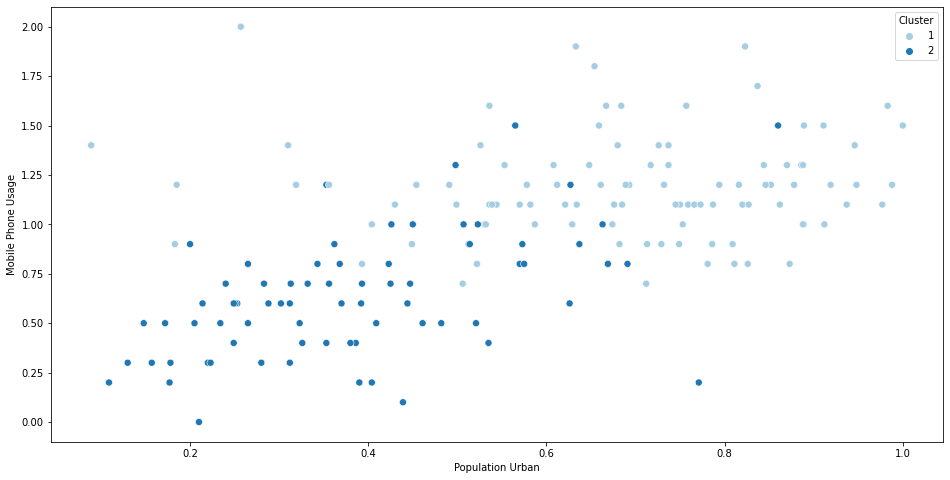

In [395]:
# Population Urban vs Mobile Phone Usage
sns.scatterplot(data=dwi, x = 'Population Urban', y = 'Mobile Phone Usage', s=50, hue='Cluster', palette = "Paired")
plt.show()